In [211]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import inv
from numpy import linalg as LA

### Задача Римана о распаде

### Параметры

In [212]:
L = 10; T = 0.02
gama = 5/3
vl = 0; rol = 13; Pl = 10e5; el = Pl/((gama - 1)*rol)
vr = 0; ror = 1.3; Pr = 1e5; er = Pr/((gama - 1)*ror)

### Расчет

In [213]:
def solve(n,m,T,L,gama,vl,rol,Pl,rl,vr,ror,Pr,er,time):
    t = np.linspace(0,T,n+1)
    tau = T/n; t0 = 0
    x = np.linspace(-L,L,m+1)
    h = (2*L)/m; x0 = len(x)//2
    w = np.zeros([len(t)+1,len(x),3])
    w_right = [np.array([rol, rol*vl, rol*el]) for i in x[:x0]]
    w_left = [np.array([ror, ror*vr, ror*er]) for i in x[x0:]]
    w[0] = w_right + w_left
    wl = lambda prev, curr, next, A, omega, omega_inv, Lambda: curr-tau*np.dot(A,(next-prev)/(2*h))+tau*np.dot(np.dot(np.dot(omega_inv,Lambda),omega),(next-2*curr+prev)/(2*h))

    for i in range(len(t)):
        t0 += tau
        for j in range(len(x)):
            u = w[i][j][1]/w[i][j][0]
            e = w[i][j][2]/w[i][j][0]
            c = math.sqrt(gama*(gama-1)*e)
            omega = np.matrix([[-u*c,c,gama-1], [-c**2,0,gama-1], [u*c,-c,gama-1]])
            omega_inv = inv(omega)
            A = np.array([[0, 1, 0], [-u**2, 2*u, gama-1], [-gama*u*e, gama*e, u]])
            Lambda = np.diag([abs(u+c), abs(u), abs(u-c)])
            CFL = max(abs(u+c), abs(u), abs(u-c))*tau/h
            if CFL > 1:
                return -1
            if j == len(x)-1:
                w[i+1][j] = wl(w[i][j-2], w[i][j-1], w[i][j], A, omega, omega_inv, Lambda)
            elif j == 0:
                w[i+1][j] = wl(w[i][j], w[i][j+1], w[i][j+2], A, omega, omega_inv, Lambda)
            else:
                w[i+1][j] = wl(w[i][j-1], w[i][j], w[i][j+1], A, omega, omega_inv, Lambda)
        if abs(t0 - time) < 10**(-6): 
            vals = []
            for s in range(len(x)):
                vals.append([w[i][s][0],w[i][s][1],w[i][s][2]])
            return vals, x

In [214]:
vals1,x1 = solve(1000,100,T,L,gama,vl,rol,Pl,el,vr,ror,Pr,er,0.015)

In [215]:
def get_elements(vals):
    ro = []; u = []; e = []; P = []
    for element in vals:
        ro.append(element[0])
        u.append(element[1]/element[0])
        e.append(element[2]/element[0])
        P.append((gama - 1)*element[2])
    return ro,u,e,P

In [216]:
ro,u,e,P = get_elements(vals1)

### Графики

In [217]:
def graphs(ro,u,t,P,x,time):
    fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2)
    fig.suptitle(f't = {time} с')
    fig.set_figheight(10)
    fig.set_figwidth(16)
    plt.subplots_adjust(wspace=0.2)
    ax1.scatter(x1,ro, color = "blue")
    ax1.set_xlabel(r'$x, м$')
    ax1.set_ylabel(r'$\rho, кг/м^3$')
    ax1.minorticks_on()
    ax1.grid(which='major',
        color = 'grey', 
        linewidth = 0.7)

    ax2.scatter(x,u, color = "blue")
    ax2.set_xlabel(r'$x, м$')
    ax2.set_ylabel(r'$u, м/c$')
    ax2.minorticks_on()
    ax2.grid(which='major',
        color = 'grey', 
        linewidth = 0.7)

    ax3.scatter(x,e, color = "blue")
    ax3.set_xlabel(r'$x, м$')
    ax3.set_ylabel(r'$e, кДж/кг$')
    ax3.minorticks_on()
    ax3.grid(which='major',
        color = 'grey', 
        linewidth = 0.7)

    ax4.scatter(x,P, color = "blue")
    ax4.set_xlabel(r'$x, м$')
    ax4.set_ylabel(r'$p, атм$')
    ax4.minorticks_on()
    ax4.grid(which='major',
        color = 'grey', 
        linewidth = 0.7)
    
    plt.show()

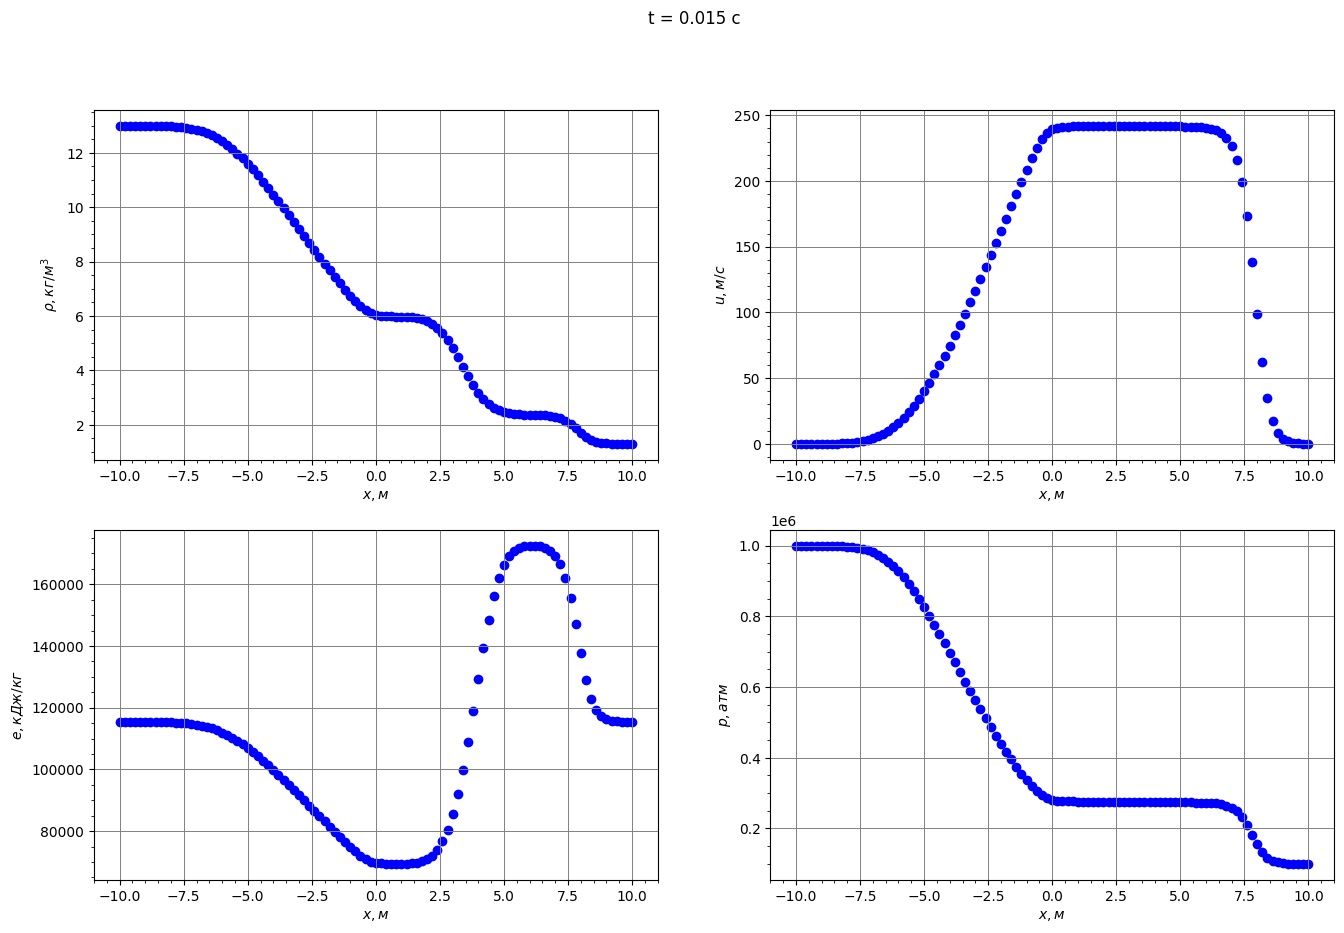

In [218]:
graphs(ro,u,t,P,x,0.015)

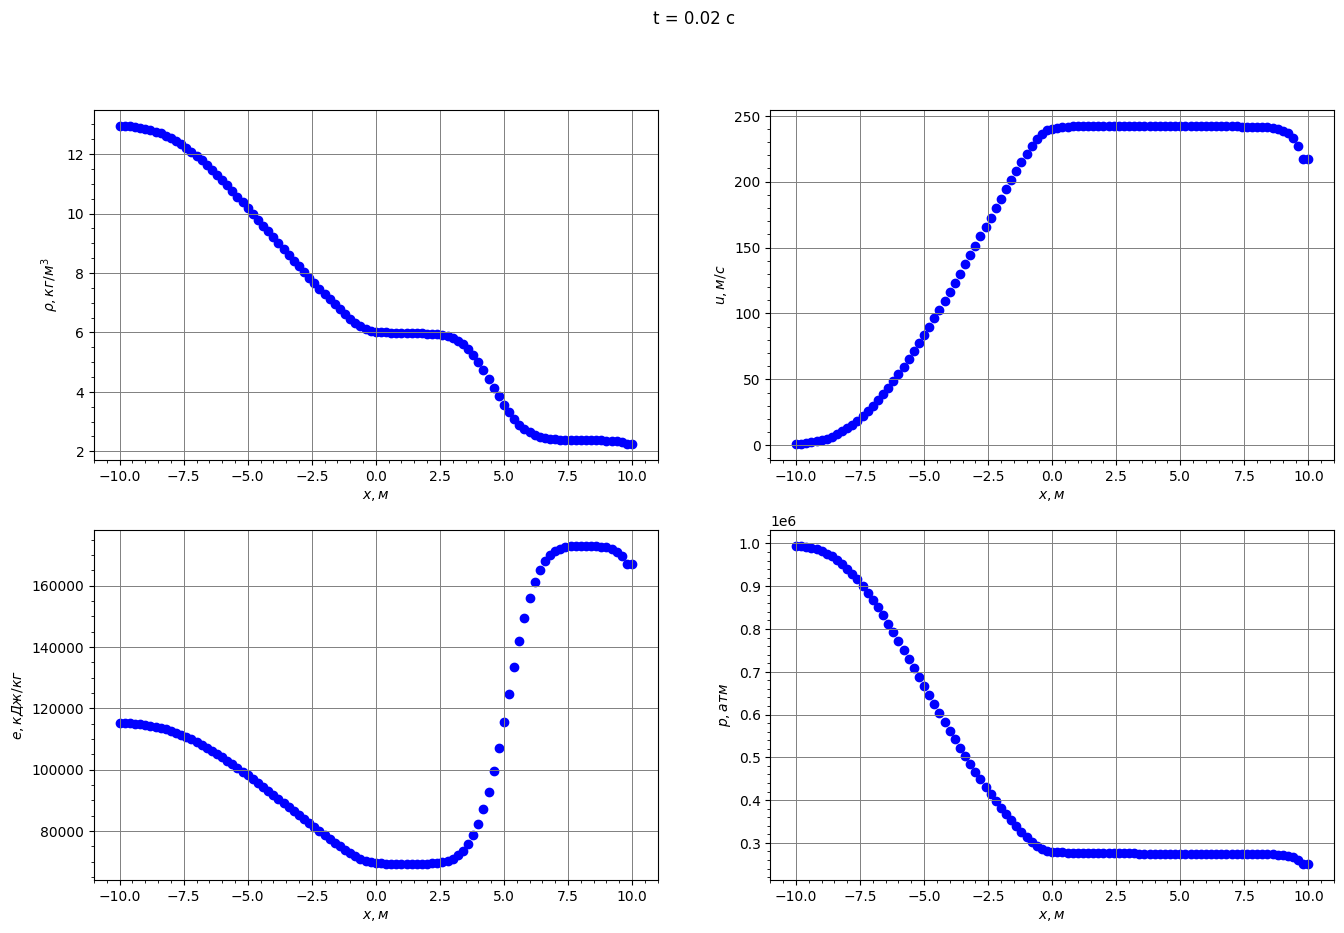

In [219]:
time = 0.02
vals,x = solve(1000,100,T,L,gama,vl,rol,Pl,el,vr,ror,Pr,er,time)
ro,u,e,P = get_elements(vals)
graphs(ro,u,t,P,x,time)

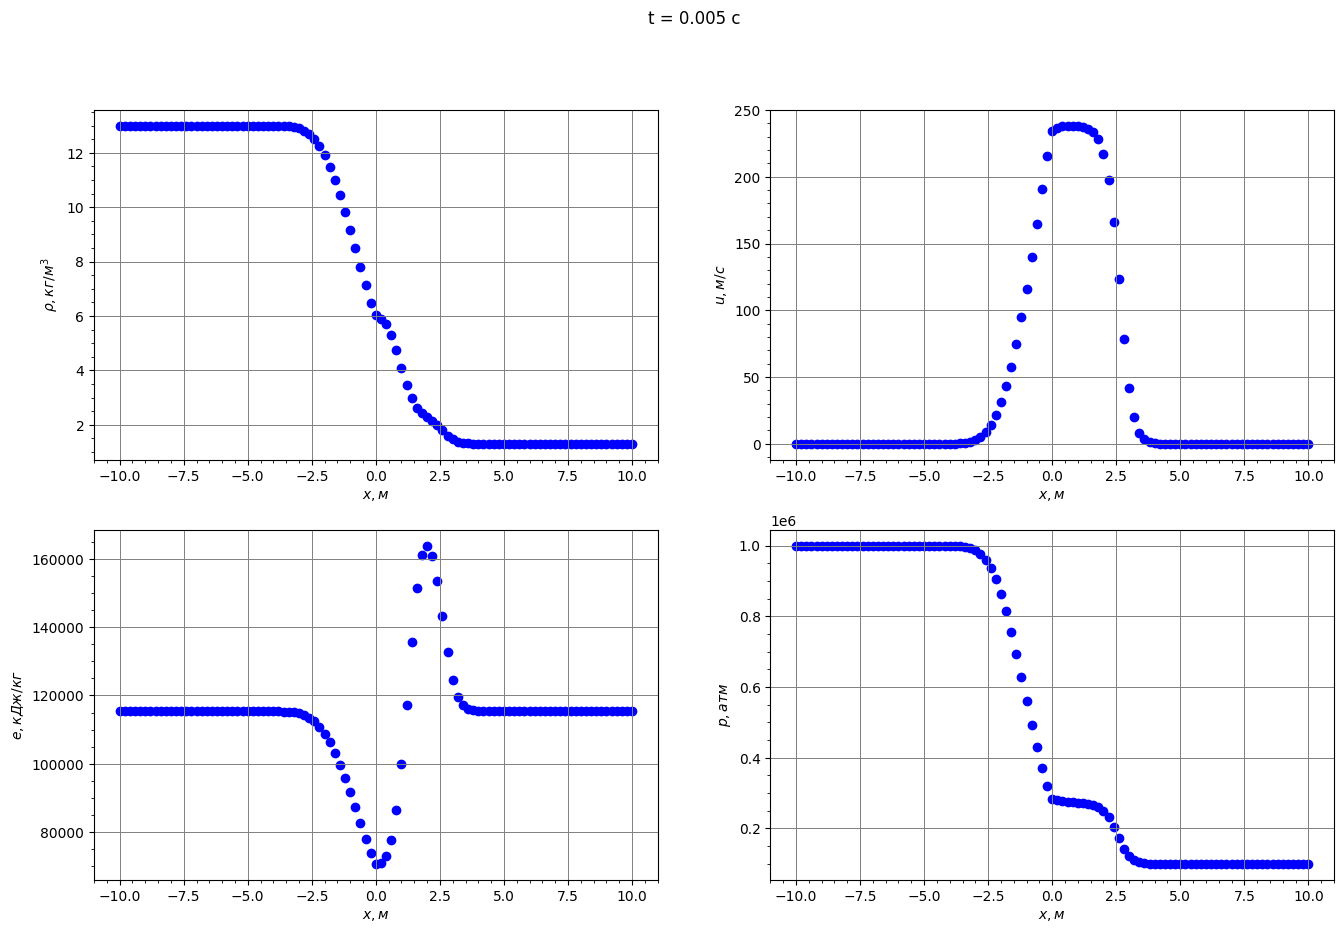

In [220]:
time = 0.005
vals,x = solve(1000,100,T,L,gama,vl,rol,Pl,el,vr,ror,Pr,er,time)
ro,u,e,P = get_elements(vals)
graphs(ro,u,t,P,x,time)